<a href="https://colab.research.google.com/github/Derinhelm/parser_stat/blob/tokenization_changing/Russian_token_parser_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Копирование репозитория

In [ ]:
!git clone -b tokenization_changing https://github.com/Derinhelm/parser_stat.git

Cloning into 'parser_stat'...
remote: Enumerating objects: 201, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 201 (delta 44), reused 45 (delta 24), pack-reused 122 (from 1)
Receiving objects: 100% (201/201), 45.05 MiB | 6.60 MiB/s, done.
Resolving deltas: 100% (104/104), done.
Updating files: 100% (24/24), done.


In [ ]:
import sys
sys.path.append('/content/parser_stat')

In [ ]:
!mkdir pics

# Получение данных

In [ ]:
from data_classes import ConllEntry, Sentence

In [ ]:
import pickle

In [ ]:
with open('/content/parser_stat/treebank_test_sets/treebank_data.pickle', 'rb') as f:
    treebanks = pickle.load(f)

In [ ]:
for t, sent_list in treebanks.items():
    print(t, len(sent_list))
    # checking the index uniqueness
    assert len({s.sent_id for s in sent_list}) == len(sent_list)

gsd 601
pud 1000
syntagrus 8800
poetry 728
taiga 881


In [ ]:
treebank_names = ['taiga', 'poetry', 'gsd', 'pud', 'syntagrus']

# Получение результата синтаксического анализа

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
parser_names = [ "natasha", "natasha_t", "udpipe", "udpipe_t", "spacy", "spacy_t",
                 "deeppavlov", "deeppavlov_t", "stanza", "stanza_t" ]
real_parser_names = [p for p in parser_names if p[-2:] != "_t"]

In [ ]:
real_parser_names

['natasha', 'udpipe', 'spacy', 'deeppavlov', 'stanza']

In [ ]:
parser_res = {}
for p in parser_names:
    print(p)
    with open(f'/content/parser_stat/pickle_results/{p}.pickle', 'rb') as f:
       parser_res[p] = pickle.load(f)

natasha
natasha_t
udpipe
udpipe_t
spacy
spacy_t
deeppavlov
deeppavlov_t
stanza
stanza_t


In [ ]:
for p in parser_names:
  for t in treebanks:
    assert len(treebanks[t]) == len(parser_res[p][t])

In [ ]:
[(t.id, t.parent_id, t.relation, t.form) for t in treebanks['syntagrus'][2141].tokens]

[('1', '3', 'advmod', 'Снаружи'),
 ('2', '3', 'nsubj', 'дом'),
 ('3', '0', 'root', 'выглядит'),
 ('4', '3', 'obl', 'небольшим'),
 ('5', '3', 'punct', '.')]

## Сдвиг предложений

In [ ]:
from copy import deepcopy
parser_res_original = deepcopy(parser_res)

In [ ]:
[(t.id, t.parent_id, t.relation) for t in parser_res['stanza']['syntagrus'][95].tokens]

[('1', '4', 'obl'),
 ('2', '4', 'case'),
 ('3', '4', 'amod'),
 ('4', '0', 'root'),
 ('5', '4', 'nsubj'),
 ('6', '5', 'flat:foreign'),
 ('7', '5', 'flat:foreign'),
 ('8', '5', 'flat:foreign'),
 ('9', '5', 'flat:foreign'),
 ('10', '4', 'punct'),
 ('1', '2', 'punct'),
 ('2', '4', 'parataxis'),
 ('3', '2', 'punct'),
 ('4', '0', 'root'),
 ('5', '4', 'xcomp'),
 ('6', '5', 'obj'),
 ('7', '8', 'amod'),
 ('8', '6', 'nmod'),
 ('9', '4', 'punct')]

In [ ]:
[i for (i, t) in enumerate(parser_res['stanza']['syntagrus'][95].tokens) if t.id == '1']

[0, 10]

In [ ]:
parser_res['stanza']['syntagrus'][95].sent_id

'2003Armeniya.xml_96'

In [ ]:
for t in treebank_names:
  for p in parser_names:
      print(t, p, len([i for (i, sent) in enumerate(parser_res[p][t])
       if len([t.relation for t in sent.tokens if t.relation == "root"]) > 1]))

taiga natasha 95
taiga natasha_t 68
taiga udpipe 42
taiga udpipe_t 0
taiga spacy 69
taiga spacy_t 65
taiga deeppavlov 67
taiga deeppavlov_t 68
taiga stanza 69
taiga stanza_t 0
poetry natasha 148
poetry natasha_t 140
poetry udpipe 43
poetry udpipe_t 0
poetry spacy 24
poetry spacy_t 21
poetry deeppavlov 50
poetry deeppavlov_t 50
poetry stanza 65
poetry stanza_t 0
gsd natasha 83
gsd natasha_t 70
gsd udpipe 7
gsd udpipe_t 0
gsd spacy 14
gsd spacy_t 7
gsd deeppavlov 18
gsd deeppavlov_t 19
gsd stanza 5
gsd stanza_t 0
pud natasha 98
pud natasha_t 98
pud udpipe 7
pud udpipe_t 0
pud spacy 18
pud spacy_t 5
pud deeppavlov 3
pud deeppavlov_t 3
pud stanza 4
pud stanza_t 0
syntagrus natasha 1073
syntagrus natasha_t 1078
syntagrus udpipe 57
syntagrus udpipe_t 0
syntagrus spacy 220
syntagrus spacy_t 259
syntagrus deeppavlov 131
syntagrus deeppavlov_t 127
syntagrus stanza 190
syntagrus stanza_t 0


In [ ]:
[i for (i, sent) in enumerate(parser_res['stanza']['syntagrus'])
    if len([t.relation for t in sent.tokens if t.relation == "root"]) > 2]

[6424]

In [ ]:
parser_res['stanza']['syntagrus'][6424].sent_id

'2013Martovskaya_revolyutsiya.xml_88'

In [ ]:
[(t.id, t.parent_id, t.relation, t.form) for t in parser_res['natasha']['taiga'][704].tokens]

[('1', '3', 'mark', 'Чтобы'),
 ('2', '3', 'nsubj', 'все'),
 ('3', '3', 'ccomp', 'видели'),
 ('4', '6', 'punct', ','),
 ('5', '6', 'advmod', 'как'),
 ('6', '3', 'ccomp', 'меняется'),
 ('7', '6', 'nsubj', 'Уфа'),
 ('8', '10', 'case', 'в'),
 ('9', '10', 'amod', 'лучшую'),
 ('10', '6', 'obl', 'сторону'),
 ('11', '3', 'punct', '.'),
 ('1', '0', 'root', '😜')]

In [ ]:
[(t.id, t.parent_id, t.relation, t.form) for t in parser_res['natasha_t']['taiga'][704].tokens]

[('1', '3', 'mark', 'Чтобы'),
 ('2', '3', 'nsubj', 'все'),
 ('3', '3', 'ccomp', 'видели'),
 ('4', '6', 'punct', ','),
 ('5', '6', 'advmod', 'как'),
 ('6', '3', 'ccomp', 'меняется'),
 ('7', '6', 'nsubj', 'Уфа'),
 ('8', '10', 'case', 'в'),
 ('9', '10', 'amod', 'лучшую'),
 ('10', '6', 'obl', 'сторону'),
 ('11', '6', 'punct', '.'),
 ('12', '10', 'punct', '😜')]

In [ ]:
[(t.id, t.parent_id, t.relation, t.form) for t in parser_res['udpipe']['taiga'][704].tokens]

[('1', '3', 'mark', 'Чтобы'),
 ('2', '3', 'nsubj', 'все'),
 ('3', '0', 'root', 'видели'),
 ('4', '6', 'punct', ','),
 ('5', '6', 'mark', 'как'),
 ('6', '3', 'ccomp', 'меняется'),
 ('7', '6', 'nsubj', 'Уфа'),
 ('8', '10', 'case', 'в'),
 ('9', '10', 'amod', 'лучшую'),
 ('10', '6', 'obl', 'сторону'),
 ('11', '3', 'punct', '.'),
 ('12', '0', 'root', '😜')]

In [ ]:
[(t.id, t.parent_id, t.relation, t.form) for t in parser_res['udpipe_t']['taiga'][704].tokens]

[('1', '3', 'mark', 'Чтобы'),
 ('2', '3', 'nsubj', 'все'),
 ('3', '12', 'advcl', 'видели'),
 ('4', '6', 'punct', ','),
 ('5', '6', 'mark', 'как'),
 ('6', '3', 'ccomp', 'меняется'),
 ('7', '6', 'nsubj', 'Уфа'),
 ('8', '10', 'case', 'в'),
 ('9', '10', 'amod', 'лучшую'),
 ('10', '6', 'obl', 'сторону'),
 ('11', '3', 'punct', '.'),
 ('12', '0', 'root', '😜')]

In [ ]:
[(t.id, t.parent_id, t.relation, t.form) for t in parser_res['spacy']['taiga'][515].tokens]

[('1', '16', 'iobj', 'Детям'),
 ('2', '4', 'case', 'до'),
 ('3', '4', 'nummod', '6'),
 ('4', '1', 'nmod', 'лет'),
 ('5', '6', 'punct', '('),
 ('6', '4', 'parataxis', 'масса'),
 ('7', '6', 'nmod', 'тела'),
 ('8', '10', 'advmod', 'менее'),
 ('9', '10', 'nummod', '22'),
 ('10', '7', 'nmod', 'кг'),
 ('11', '6', 'punct', ')'),
 ('12', '13', 'punct', '–'),
 ('13', '16', 'nummod', '0,25'),
 ('14', '16', 'nummod', '-'),
 ('15', '16', 'nummod', '1'),
 ('16', '0', 'root', 'мл'),
 ('17', '21', 'punct', '('),
 ('18', '21', 'nummod', '0,25'),
 ('19', '21', 'nummod', '-'),
 ('20', '21', 'nummod', '1'),
 ('21', '16', 'parataxis', 'мг'),
 ('22', '26', 'punct', '–'),
 ('23', '26', 'nummod', '5'),
 ('24', '26', 'nummod', '-'),
 ('25', '26', 'nummod', '20'),
 ('26', '21', 'parataxis', 'капель'),
 ('27', '21', 'punct', ')'),
 ('28', '31', 'punct', ','),
 ('29', '31', 'case', 'до'),
 ('30', '31', 'nummod', '3'),
 ('31', '16', 'conj', 'раз'),
 ('32', '33', 'case', 'в'),
 ('33', '31', 'nmod', 'день')]

In [ ]:
[(t.id, t.parent_id, t.relation, t.form) for t in parser_res['spacy_t']['taiga'][515].tokens]

[('1', '16', 'iobj', 'Детям'),
 ('2', '4', 'case', 'до'),
 ('3', '4', 'nummod', '6'),
 ('4', '1', 'nmod', 'лет'),
 ('5', '6', 'punct', '('),
 ('6', '4', 'parataxis', 'масса'),
 ('7', '6', 'nmod', 'тела'),
 ('8', '10', 'advmod', 'менее'),
 ('9', '10', 'nummod', '22'),
 ('10', '7', 'nmod', 'кг'),
 ('11', '6', 'punct', ')'),
 ('12', '13', 'punct', '–'),
 ('13', '16', 'nummod', '0,25'),
 ('14', '16', 'nummod', '-'),
 ('15', '16', 'nummod', '1'),
 ('16', '0', 'root', 'мл'),
 ('17', '21', 'punct', '('),
 ('18', '21', 'nummod', '0,25'),
 ('19', '21', 'nummod', '-'),
 ('20', '21', 'nummod', '1'),
 ('21', '16', 'parataxis', 'мг'),
 ('22', '26', 'punct', '–'),
 ('23', '26', 'nummod', '5'),
 ('24', '26', 'nummod', '-'),
 ('25', '26', 'nummod', '20'),
 ('26', '21', 'parataxis', 'капель'),
 ('27', '26', 'punct', ')'),
 ('28', '31', 'punct', ','),
 ('29', '31', 'case', 'до'),
 ('30', '31', 'nummod', '3'),
 ('31', '16', 'conj', 'раз'),
 ('32', '33', 'case', 'в'),
 ('33', '31', 'nmod', 'день')]

In [ ]:
[(t.id, t.parent_id, t.relation) for t in parser_res['stanza']['syntagrus'][6424].tokens]

[('1', '0', 'root'),
 ('2', '3', 'advmod'),
 ('3', '1', 'nsubj'),
 ('4', '3', 'obl'),
 ('5', '9', 'punct'),
 ('6', '9', 'cc'),
 ('7', '8', 'amod'),
 ('8', '9', 'nsubj'),
 ('9', '1', 'conj'),
 ('10', '12', 'case'),
 ('11', '12', 'det'),
 ('12', '9', 'obl'),
 ('13', '17', 'punct'),
 ('14', '17', 'amod'),
 ('15', '17', 'amod'),
 ('16', '17', 'amod'),
 ('17', '12', 'parataxis'),
 ('18', '19', 'punct'),
 ('19', '17', 'parataxis'),
 ('20', '19', 'flat'),
 ('21', '22', 'amod'),
 ('22', '19', 'nmod'),
 ('23', '19', 'punct'),
 ('24', '1', 'punct'),
 ('1', '3', 'amod'),
 ('2', '3', 'amod'),
 ('3', '0', 'root'),
 ('4', '5', 'punct'),
 ('5', '3', 'parataxis'),
 ('6', '5', 'flat'),
 ('7', '5', 'punct'),
 ('8', '3', 'punct'),
 ('1', '3', 'amod'),
 ('2', '3', 'amod'),
 ('3', '0', 'root'),
 ('4', '5', 'punct'),
 ('5', '3', 'parataxis'),
 ('6', '5', 'flat'),
 ('7', '5', 'punct'),
 ('8', '9', 'punct'),
 ('9', '3', 'conj'),
 ('10', '9', 'nmod'),
 ('11', '12', 'punct'),
 ('12', '10', 'parataxis'),
 ('13',

In [ ]:
def shift_token_id(sentence):
  first_token_shift = 0
  for i, t in enumerate(sentence.tokens):
    if t.id == '1':
      first_token_shift = i
    shift_id = str(int(t.id) + first_token_shift)
    if t.parent_id != '0':
      shift_parent_id = str(int(t.parent_id) + first_token_shift)
    else:
      shift_parent_id = '0'
    #print(shift_id, t.id, "    ", shift_parent_id, t.parent_id)
    t.id = shift_id
    t.parent_id = shift_parent_id

In [ ]:
shift_sent_id = { tr: {} for tr in treebank_names }
many_root_sent_id = { tr: {} for tr in treebank_names }

In [ ]:
for t in treebank_names:
  for p in parser_names:
    shift_sent_id[t][p] = set()
    many_root_sent_id[t][p] = set()
    for s_i, s in enumerate(parser_res[p][t]):
      root_token_ids = [t.relation for t in s.tokens if t.relation == "root"]
      if len(root_token_ids) > 1:
        many_root_sent_id[t][p].add(s_i)
      start_token_ids = [t.id for t in s.tokens if t.id == "1"]
      if len(start_token_ids) > 1:
          shift_sent_id[t][p].add(s_i)
          shift_token_id(s)
    print(t, p, many_root_sent_id[t][p], shift_sent_id[t][p])

taiga natasha {1, 13, 537, 549, 56, 57, 58, 572, 62, 576, 70, 585, 586, 76, 78, 590, 595, 601, 90, 604, 105, 617, 109, 110, 624, 631, 128, 136, 138, 657, 658, 666, 668, 669, 161, 162, 167, 169, 170, 175, 178, 182, 696, 699, 188, 189, 190, 194, 195, 199, 201, 206, 729, 228, 233, 245, 250, 763, 252, 766, 257, 265, 780, 274, 789, 279, 792, 804, 805, 294, 811, 303, 314, 318, 835, 836, 844, 847, 848, 854, 858, 866, 870, 876, 367, 376, 385, 422, 436, 485, 491, 501, 503, 504, 509} {576, 668, 704, 73, 201, 585, 811, 13, 590, 274, 729, 631, 696, 601, 699, 572}
taiga natasha_t {128, 1, 136, 265, 138, 780, 789, 279, 792, 537, 666, 669, 161, 162, 804, 549, 294, 422, 168, 169, 170, 805, 175, 303, 178, 436, 182, 56, 57, 58, 314, 62, 190, 318, 195, 835, 836, 70, 76, 844, 78, 206, 847, 848, 595, 854, 90, 858, 604, 866, 228, 870, 871, 233, 617, 491, 109, 110, 367, 624, 245, 501, 503, 504, 629, 763, 252, 509} set()
taiga udpipe {509, 13, 269, 274, 532, 535, 538, 158, 165, 39, 167, 168, 299, 557, 178, 69

In [ ]:
shift_sent_id['taiga']['natasha']

{13, 73, 201, 274, 572, 576, 585, 590, 601, 631, 668, 696, 699, 704, 729, 811}

In [ ]:
shift_sent_id['taiga']['spacy']

set()

In [ ]:
[(t.id, t.parent_id, t.relation) for t in parser_res['udpipe']['taiga'][704].tokens]

[('1', '3', 'mark'),
 ('2', '3', 'nsubj'),
 ('3', '0', 'root'),
 ('4', '6', 'punct'),
 ('5', '6', 'mark'),
 ('6', '3', 'ccomp'),
 ('7', '6', 'nsubj'),
 ('8', '10', 'case'),
 ('9', '10', 'amod'),
 ('10', '6', 'obl'),
 ('11', '3', 'punct'),
 ('12', '0', 'root')]

In [ ]:
[(t.id, t.parent_id, t.relation) for t in parser_res['stanza']['syntagrus'][6424].tokens]

[('1', '0', 'root'),
 ('2', '3', 'advmod'),
 ('3', '1', 'nsubj'),
 ('4', '3', 'obl'),
 ('5', '9', 'punct'),
 ('6', '9', 'cc'),
 ('7', '8', 'amod'),
 ('8', '9', 'nsubj'),
 ('9', '1', 'conj'),
 ('10', '12', 'case'),
 ('11', '12', 'det'),
 ('12', '9', 'obl'),
 ('13', '17', 'punct'),
 ('14', '17', 'amod'),
 ('15', '17', 'amod'),
 ('16', '17', 'amod'),
 ('17', '12', 'parataxis'),
 ('18', '19', 'punct'),
 ('19', '17', 'parataxis'),
 ('20', '19', 'flat'),
 ('21', '22', 'amod'),
 ('22', '19', 'nmod'),
 ('23', '19', 'punct'),
 ('24', '1', 'punct'),
 ('25', '27', 'amod'),
 ('26', '27', 'amod'),
 ('27', '0', 'root'),
 ('28', '29', 'punct'),
 ('29', '27', 'parataxis'),
 ('30', '29', 'flat'),
 ('31', '29', 'punct'),
 ('32', '27', 'punct'),
 ('33', '35', 'amod'),
 ('34', '35', 'amod'),
 ('35', '0', 'root'),
 ('36', '37', 'punct'),
 ('37', '35', 'parataxis'),
 ('38', '37', 'flat'),
 ('39', '37', 'punct'),
 ('40', '41', 'punct'),
 ('41', '35', 'conj'),
 ('42', '41', 'nmod'),
 ('43', '44', 'punct'),
 (

# Преобразование в пары (начало токена, конец токена)

be_edges - set of dependency tree edges in begin-end format

In [ ]:
from functions import create_sent_be_nodes, create_sent_be_edges

In [ ]:
from collections import OrderedDict

In [ ]:
be_treebanks = {}
be_token_dict_gold = {}
for treebank_n in treebank_names:
    be_treebanks[treebank_n] = OrderedDict()
    be_token_dict_gold[treebank_n] = OrderedDict()
    for i, sent in enumerate(treebanks[treebank_n]):
        be_sent, be_token_dict_gold[treebank_n][sent.sent_id] = create_sent_be_nodes(sent, lambda text: text.lower())
        be_treebanks[treebank_n][sent.sent_id] = create_sent_be_edges(be_sent)

In [ ]:
be_treebanks['syntagrus']['2003Artist_mimansa.xml_130']

{(0, 2): ((16, 20), 'nsubj'),
 (3, 15): ((16, 20), 'advmod'),
 (16, 20): ((-1, -1), 'root'),
 (21, 24): ((25, 34), 'det'),
 (25, 34): ((16, 20), 'obj'),
 (35, 43): ((16, 20), 'advmod'),
 (43, 44): ((16, 20), 'punct')}

In [ ]:
be_token_dict_gold['gsd']['test-s600']

{(0, 6): <data_classes.ConllEntry at 0x7cbb8d0cc4d0>,
 (7, 15): <data_classes.ConllEntry at 0x7cbb8d0cc650>,
 (16, 19): <data_classes.ConllEntry at 0x7cbb8d0cc7d0>,
 (20, 29): <data_classes.ConllEntry at 0x7cbb8d0cc950>,
 (30, 31): <data_classes.ConllEntry at 0x7cbb8d0ccad0>,
 (32, 34): <data_classes.ConllEntry at 0x7cbb8d0ccc50>,
 (35, 38): <data_classes.ConllEntry at 0x7cbb8d0cce50>,
 (39, 45): <data_classes.ConllEntry at 0x7cbb8d0cd050>,
 (46, 48): <data_classes.ConllEntry at 0x7cbb8d0cd1d0>,
 (49, 51): <data_classes.ConllEntry at 0x7cbb8d0cd390>,
 (52, 53): <data_classes.ConllEntry at 0x7cbb8d0cd590>,
 (53, 54): <data_classes.ConllEntry at 0x7cbb8d0cd790>}

{(0, 2): ((16, 20), 'nsubj'),

 (3, 15): ((16, 20), 'advmod'),

 (16, 20): ((-1, -1), 'root'),

 (21, 24): ((25, 34), 'det'),

 (25, 34): ((16, 20), 'obj'),

 (35, 43): ((16, 20), 'advmod'),

 (43, 44): ((16, 20), 'punct')}


In [ ]:
be_parser_res = {p: {} for p in parser_names}
for p in parser_names:
  if p == 'deeppavlov':
    transform_fun = lambda text: text.lower().replace('``', '"').replace("''", '"')
  else:
    transform_fun = lambda text: text.lower().replace("''", '"')
  for t in treebank_names:
    be_parser_res[p][t] = OrderedDict()
    for i, sent in enumerate(parser_res[p][t]):
        be_sent, _ = create_sent_be_nodes(sent, transform_fun)
        be_parser_res[p][t][sent.sent_id] = create_sent_be_edges(be_sent)

In [ ]:
be_parser_res['stanza']['syntagrus']['2003Armeniya.xml_96']

{(0, 3): ((11, 15), 'obl'),
 (4, 5): ((11, 15), 'case'),
 (6, 10): ((11, 15), 'amod'),
 (11, 15): ((-1, -1), 'root'),
 (16, 24): ((11, 15), 'nsubj'),
 (25, 33): ((16, 24), 'flat:foreign'),
 (34, 42): ((16, 24), 'flat:foreign'),
 (43, 50): ((16, 24), 'flat:foreign'),
 (51, 54): ((16, 24), 'flat:foreign'),
 (54, 55): ((11, 15), 'punct'),
 (56, 57): ((57, 64), 'punct'),
 (57, 64): ((66, 72), 'parataxis'),
 (64, 65): ((57, 64), 'punct'),
 (66, 72): ((-1, -1), 'root'),
 (73, 86): ((66, 72), 'xcomp'),
 (87, 93): ((73, 86), 'obj'),
 (94, 105): ((106, 111), 'amod'),
 (106, 111): ((87, 93), 'nmod'),
 (111, 112): ((66, 72), 'punct')}

((0, 2), ((16, 20), 'nsubj')),

((3, 9), ((16, 20), 'obl')),

((9, 10), ((10, 15), 'punct')),

((10, 15), ((3, 9), 'conj')),

((16, 20), ((-1, -1), 'root')),

((21, 24), ((25, 34), 'det')),

((25, 34), ((16, 20), 'obj')),

((35, 43), ((16, 20), 'advmod')),

((43, 44), ((16, 20), 'punct'))]

# Вычисление статистики на уровне токенов

In [ ]:
def calculate_token_stat(be_gold, be_res_p, be_res_p_t, be_token_dict):
  token_stat_list = []
  for sent_i, sent_id in enumerate(be_gold):
    for (g_t_be, (g_par_be, g_rel)) in be_gold[sent_id].items():
      t = be_token_dict[sent_id][g_t_be]
      if g_t_be in be_res_p[sent_id]:
        p_match_flag = True
        p_par_be, p_rel = be_res_p[sent_id][g_t_be]
        p_head_flag = g_par_be == p_par_be
        p_rel_flag = g_rel == p_rel
      else:
        p_match_flag, p_head_flag, p_rel_flag = False, False, False

      if g_t_be in be_res_p_t[sent_id]:
        pt_match_flag = True
        pt_par_be, pt_rel = be_res_p_t[sent_id][g_t_be]
        pt_head_flag = g_par_be == pt_par_be
        pt_rel_flag = g_rel == pt_rel
      else:
        pt_match_flag, pt_head_flag, pt_rel_flag = False, False, False
      token_stat_list.append((sent_i, sent_id, g_t_be, p_match_flag, p_head_flag, p_rel_flag,
             pt_match_flag, pt_head_flag, pt_rel_flag, t.pos, t.relation))
    #x = 1 /0

  token_stat_df = pd.DataFrame(token_stat_list, columns=[ 'sent_i', 'sent_id', 'g_t_be', 'p_match_flag', 'p_head_flag', 'p_rel_flag',
             'pt_match_flag', 'pt_head_flag', 'pt_rel_flag', 'gold_pos', 'gold_rel'])

  return token_stat_df

In [ ]:
token_stat_df = {treebank: {} for treebank in treebank_names}
for treebank in treebank_names:
  for p in real_parser_names:
      token_stat_df[treebank][p] = calculate_token_stat(be_treebanks[treebank],
                                  be_parser_res[p][treebank], be_parser_res[p + "_t"][treebank],
                                  be_token_dict_gold[treebank])

Для эталонных токенов может быть получено 4 категории результата синтаксического анализа:
1. нет соответствующего токена в результате синтаксического анализа,
2. есть соответствующий токен, но для него неверно определен главный токен и тип связи,
3. есть соответствующий токен, для которого верно определен главный токен и неверно определен тип связи,
4. есть соответствующий токен, для которого верно определен и главный токен, и тип связи.

In [ ]:
def first_category(df, after_correct=False):
  if not after_correct:
      return ~df['p_match_flag']
  return ~df['pt_match_flag']

In [ ]:
def second_category(df, after_correct=False):
  if not after_correct:
      return df['p_match_flag'] & (~df['p_head_flag'])
  return df['pt_match_flag'] & (~df['pt_head_flag'])

In [ ]:
def third_category(df, after_correct=False):
  if not after_correct:
      return df['p_match_flag'] & df['p_head_flag'] & (~df['p_rel_flag'])
  return df['pt_match_flag'] & df['pt_head_flag'] & (~df['pt_rel_flag'])

In [ ]:
def fourth_category(df, after_correct=False):
  if not after_correct:
      return df['p_match_flag'] & df['p_head_flag'] & df['p_rel_flag']
  return df['pt_match_flag'] & df['pt_head_flag'] & df['pt_rel_flag']

In [ ]:
# Проверка, что после коррекции нет токенов первой категории
for tr in treebank_names:
  for p in real_parser_names:
    df = token_stat_df[tr][p]
    assert len(df[first_category(df, after_correct=True)]) == 0

## Статистика по категориям

In [ ]:
def create_category(ser, after_correct=False):
    if bool(fourth_category(ser, after_correct)):
        return 4
    if bool(third_category(ser, after_correct)):
        return 3
    if bool(second_category(ser, after_correct)):
        return 2
    if bool(first_category(ser, after_correct)):
        return 1
    return 0


In [ ]:
for tr in treebank_names:
  for p in real_parser_names:
    token_stat_df[tr][p]['p_category'] = token_stat_df[tr][p].apply(create_category, axis=1)
    token_stat_df[tr][p]['pt_category'] = token_stat_df[tr][p].apply(lambda ser: create_category(ser, after_correct=True), axis=1)

In [ ]:
# Проверка, что в pt_category нет 0
for tr in treebank_names:
  for p in real_parser_names:
    df = token_stat_df[tr][p]
    assert len(df[df['p_category'] == 0]) == 0

In [ ]:
# Проверка, что в pt_category нет 1
for tr in treebank_names:
  for p in real_parser_names:
    df = token_stat_df[tr][p]
    assert len(df[df['pt_category'] == 1]) == 0

# Вычисление UAS и LAS для предложений

In [ ]:
def calculate_stat(be_gold, be_res_p):
  stat_list = []
  for sent_id in be_gold:
    extra_gold_list = sorted(be_gold[sent_id].keys() - be_res_p[sent_id].keys())
    extra_gold = len(extra_gold_list)
    extra_parser_list = sorted(be_res_p[sent_id].keys() - be_gold[sent_id].keys())
    extra_parser = len(extra_parser_list)
    tokenisation_matched = len({t_be for t_be in be_res_p[sent_id].keys() & be_gold[sent_id].keys()})
    parent_matched = len({t_be for t_be in be_res_p[sent_id].keys() & be_gold[sent_id].keys()
      if be_res_p[sent_id][t_be][0] == be_gold[sent_id][t_be][0]})
    relation_matched = len({t_be for t_be in be_res_p[sent_id].keys() & be_gold[sent_id].keys()
      if be_res_p[sent_id][t_be] == be_gold[sent_id][t_be]})
    stat_list.append((sent_id, extra_gold, extra_gold_list, extra_parser, extra_parser_list, tokenisation_matched,
                      parent_matched, relation_matched, len(be_gold[sent_id])))
  stat = pd.DataFrame(stat_list, columns=['sent_id', 'extra_gold', 'extra_gold_list', 'extra_parser', 'extra_parser_list', 'tokenisation_matched',
                                             'parent_matched', 'relation_matched', 'token_length'])
  stat['precision_denominator'] = stat['extra_parser'] + stat['tokenisation_matched']
  stat['recall_denominator'] = stat['extra_gold'] + stat['tokenisation_matched']
  align_uas_precision = stat['parent_matched'] / (stat['extra_parser'] + stat['tokenisation_matched'])
  align_uas_recall = stat['parent_matched'] / (stat['extra_gold'] + stat['tokenisation_matched'])
  align_las_precision = stat['relation_matched'] / (stat['extra_parser'] + stat['tokenisation_matched'])
  align_las_recall = stat['relation_matched'] / (stat['extra_gold'] + stat['tokenisation_matched'])
  stat['uas_precision'] = align_uas_precision
  stat['uas_recall'] = align_uas_recall
  stat['las_precision'] = align_las_precision
  stat['las_recall'] = align_las_recall
  align_uas_f = ((2 * align_uas_precision * align_uas_recall) / (align_uas_precision + align_uas_recall)).fillna(0.0)
  align_las_f = ((2 * align_las_precision * align_las_recall) / (align_las_precision + align_las_recall)).fillna(0.0)
  stat['uas_f'] = align_uas_f
  stat['las_f'] = align_las_f
  return align_uas_f, align_las_f, stat

In [ ]:
align_uas_f = {treebank: {} for treebank in treebank_names}
align_las_f = {treebank: {} for treebank in treebank_names}
stat = {treebank: {} for treebank in treebank_names}
for treebank in treebank_names:
  for p in parser_names:
    align_uas_f[treebank][p], align_las_f[treebank][p], stat[treebank][p] = \
        calculate_stat(be_treebanks[treebank], be_parser_res[p][treebank])
align_res = {"uas_f": align_uas_f,
             "las_f": align_las_f}

In [ ]:
columns = [ 'uas_precision', 'uas_recall', 'uas_f',
            'las_precision', 'las_recall', 'las_f',
            'precision_denominator', 'recall_denominator', 'parent_matched', 'relation_matched']
metric_diff_stat = { tr: {} for tr in treebank_names }
for tr in treebank_names:
  for p in real_parser_names:
    metric_diff_stat[tr][p] = pd.DataFrame()
    for c in columns:
      metric_diff_stat[tr][p][c] = stat[tr][p + "_t"][c] - stat[tr][p][c]

# Количественная оценка

## Предложения


### UAS

In [ ]:
uas_sent_count = {}
for t in treebank_names:
  less_stat = []
  more_stat = []
  for p in real_parser_names:
      less = sum(align_uas_f[t][p] > align_uas_f[t][f'{p}_t']) / len(align_uas_f[t][p])
      equal = sum(align_uas_f[t][p] == align_uas_f[t][f'{p}_t']) / len(align_uas_f[t][p])
      more = sum(align_uas_f[t][p] < align_uas_f[t][f'{p}_t']) / len(align_uas_f[t][p])
      less_stat.append(f"{less * 100:0.0f}%")
      more_stat.append(f"{more * 100:0.0f}%")
  uas_sent_count[(t, "ум.")] = less_stat
  uas_sent_count[(t, "ув.")] = more_stat


In [ ]:
uas_sent_stat_df = pd.DataFrame(uas_sent_count, index=real_parser_names).round(0)
uas_sent_stat_df

taiga      poetry      gsd      pud      syntagrus     
             ум.  ув.    ум.  ув. ум.  ув. ум.  ув.       ум.  ув.
natasha       2%  17%     2%   5%  1%  19%  1%   5%        1%   7%
udpipe        4%  23%     7%  30%  5%  29%  2%  16%        0%   3%
spacy         8%  19%     8%  16%  4%  25%  3%  13%        8%  15%
deeppavlov    1%  24%     0%  10%  0%  17%  0%   3%        1%  10%
stanza        3%  22%     2%  35%  2%  32%  0%   5%        0%   4%

### LAS

In [ ]:
las_sent_count = {}
for t in treebank_names:
  less_stat = []
  more_stat = []
  for p in real_parser_names:
      less = sum(align_las_f[t][p] > align_las_f[t][f'{p}_t']) / len(align_las_f[t][p])
      equal = sum(align_las_f[t][p] == align_las_f[t][f'{p}_t']) / len(align_las_f[t][p])
      more = sum(align_las_f[t][p] < align_las_f[t][f'{p}_t']) / len(align_las_f[t][p])
      less_stat.append(f"{less * 100:0.0f}%")
      more_stat.append(f"{more * 100:0.0f}%")
  las_sent_count[(t, "ум.")] = less_stat
  las_sent_count[(t, "ув.")] = more_stat


In [ ]:
las_sent_stat_df = pd.DataFrame(las_sent_count, index=real_parser_names).round(0)
las_sent_stat_df

taiga      poetry      gsd      pud      syntagrus     
             ум.  ув.    ум.  ув. ум.  ув. ум.  ув.       ум.  ув.
natasha       3%  16%     2%   5%  1%  19%  1%   5%        1%   7%
udpipe        4%  23%     6%  30%  6%  28%  2%  15%        0%   3%
spacy         9%  18%     9%  17%  5%  24%  4%  14%       10%  15%
deeppavlov    2%  23%     1%  10%  0%  17%  0%   3%        1%  10%
stanza        4%  21%     2%  35%  2%  32%  0%   5%        0%   4%

## Токены

In [ ]:
tr = 'pud'
p = 'stanza'

In [ ]:
for tr in treebank_names:
  for p in real_parser_names:
    d = token_stat_df[tr][p]
    d_len = len(d)
    t_less = d[d['p_category'] > d['pt_category']]
    t_equal = d[d['p_category'] == d['pt_category']]
    t_more = d[d['p_category'] < d['pt_category']]
    print(f"{tr}, {p}, {len(t_less) / d_len:.2f}, {len(t_equal) / d_len:.2f}, {len(t_more) / d_len:.2f}",
          len(t_less) + len(t_equal) + len(t_more) == d_len)

taiga, natasha, 0.01, 0.94, 0.05 True
taiga, udpipe, 0.01, 0.93, 0.06 True
taiga, spacy, 0.02, 0.93, 0.05 True
taiga, deeppavlov, 0.00, 0.94, 0.06 True
taiga, stanza, 0.01, 0.95, 0.04 True
poetry, natasha, 0.01, 0.98, 0.02 True
poetry, udpipe, 0.02, 0.91, 0.07 True
poetry, spacy, 0.02, 0.95, 0.03 True
poetry, deeppavlov, 0.00, 0.98, 0.02 True
poetry, stanza, 0.01, 0.93, 0.06 True
gsd, natasha, 0.01, 0.94, 0.05 True
gsd, udpipe, 0.02, 0.90, 0.09 True
gsd, spacy, 0.01, 0.93, 0.06 True
gsd, deeppavlov, 0.00, 0.85, 0.15 True
gsd, stanza, 0.01, 0.91, 0.08 True
pud, natasha, 0.00, 0.99, 0.01 True
pud, udpipe, 0.00, 0.95, 0.05 True
pud, spacy, 0.00, 0.98, 0.02 True
pud, deeppavlov, 0.00, 0.99, 0.01 True
pud, stanza, 0.00, 0.99, 0.01 True
syntagrus, natasha, 0.00, 0.98, 0.02 True
syntagrus, udpipe, 0.00, 0.99, 0.01 True
syntagrus, spacy, 0.01, 0.96, 0.02 True
syntagrus, deeppavlov, 0.00, 0.98, 0.02 True
syntagrus, stanza, 0.00, 0.99, 0.01 True


In [ ]:
token_count = {}
for tr in treebank_names:
  corr_stat = []
  less_stat = []
  more_stat = []
  for p in real_parser_names:
      d = token_stat_df[tr][p]
      d_len = len(d)
      t_corr = len(d[d['p_category'] == 1]) / d_len
      t_less = len(d[(d['p_category'] != 1) & (d['p_category'] > d['pt_category'])]) / d_len
      t_more = len(d[(d['p_category'] != 1) & (d['p_category'] < d['pt_category'])]) / d_len
      corr_stat.append(f"{t_corr * 100:0.1f}%")
      less_stat.append(f"{t_less * 100:0.1f}%")
      more_stat.append(f"{t_more * 100:0.1f}%")
  token_count[(tr, "кор.")] = corr_stat
  token_count[(tr, "ум.")] = less_stat
  token_count[(tr, "ув.")] = more_stat


In [ ]:
token_count_stat_df = pd.DataFrame(token_count, index=real_parser_names).round(0)
token_count_stat_df

taiga             poetry                gsd               pud  \
            кор.   ум.   ув.   кор.   ум.   ув.   кор.   ум.   ув.  кор.   
natasha     3.4%  0.7%  1.4%   0.9%  0.8%  0.7%   3.6%  0.7%  1.5%  0.7%   
udpipe      3.9%  1.3%  1.7%   4.1%  2.3%  2.5%   6.2%  1.7%  2.5%  3.3%   
spacy       2.9%  1.7%  2.2%   1.3%  1.6%  2.0%   4.4%  0.7%  1.9%  0.9%   
deeppavlov  4.4%  0.2%  1.4%   1.6%  0.0%  0.6%  13.7%  0.0%  0.8%  0.5%   
stanza      2.9%  0.7%  1.5%   3.2%  1.1%  2.7%   6.3%  0.7%  1.6%  0.4%   

                       syntagrus              
             ум.   ув.      кор.   ум.   ув.  
natasha     0.1%  0.4%      1.4%  0.3%  0.6%  
udpipe      0.4%  1.3%      0.3%  0.1%  0.3%  
spacy       0.4%  0.8%      1.2%  1.2%  1.2%  
deeppavlov  0.0%  0.2%      1.4%  0.1%  0.7%  
stanza      0.0%  0.3%      0.3%  0.0%  0.4%

# Изменение категорий токенов (heatmap)

In [ ]:
import seaborn as sns


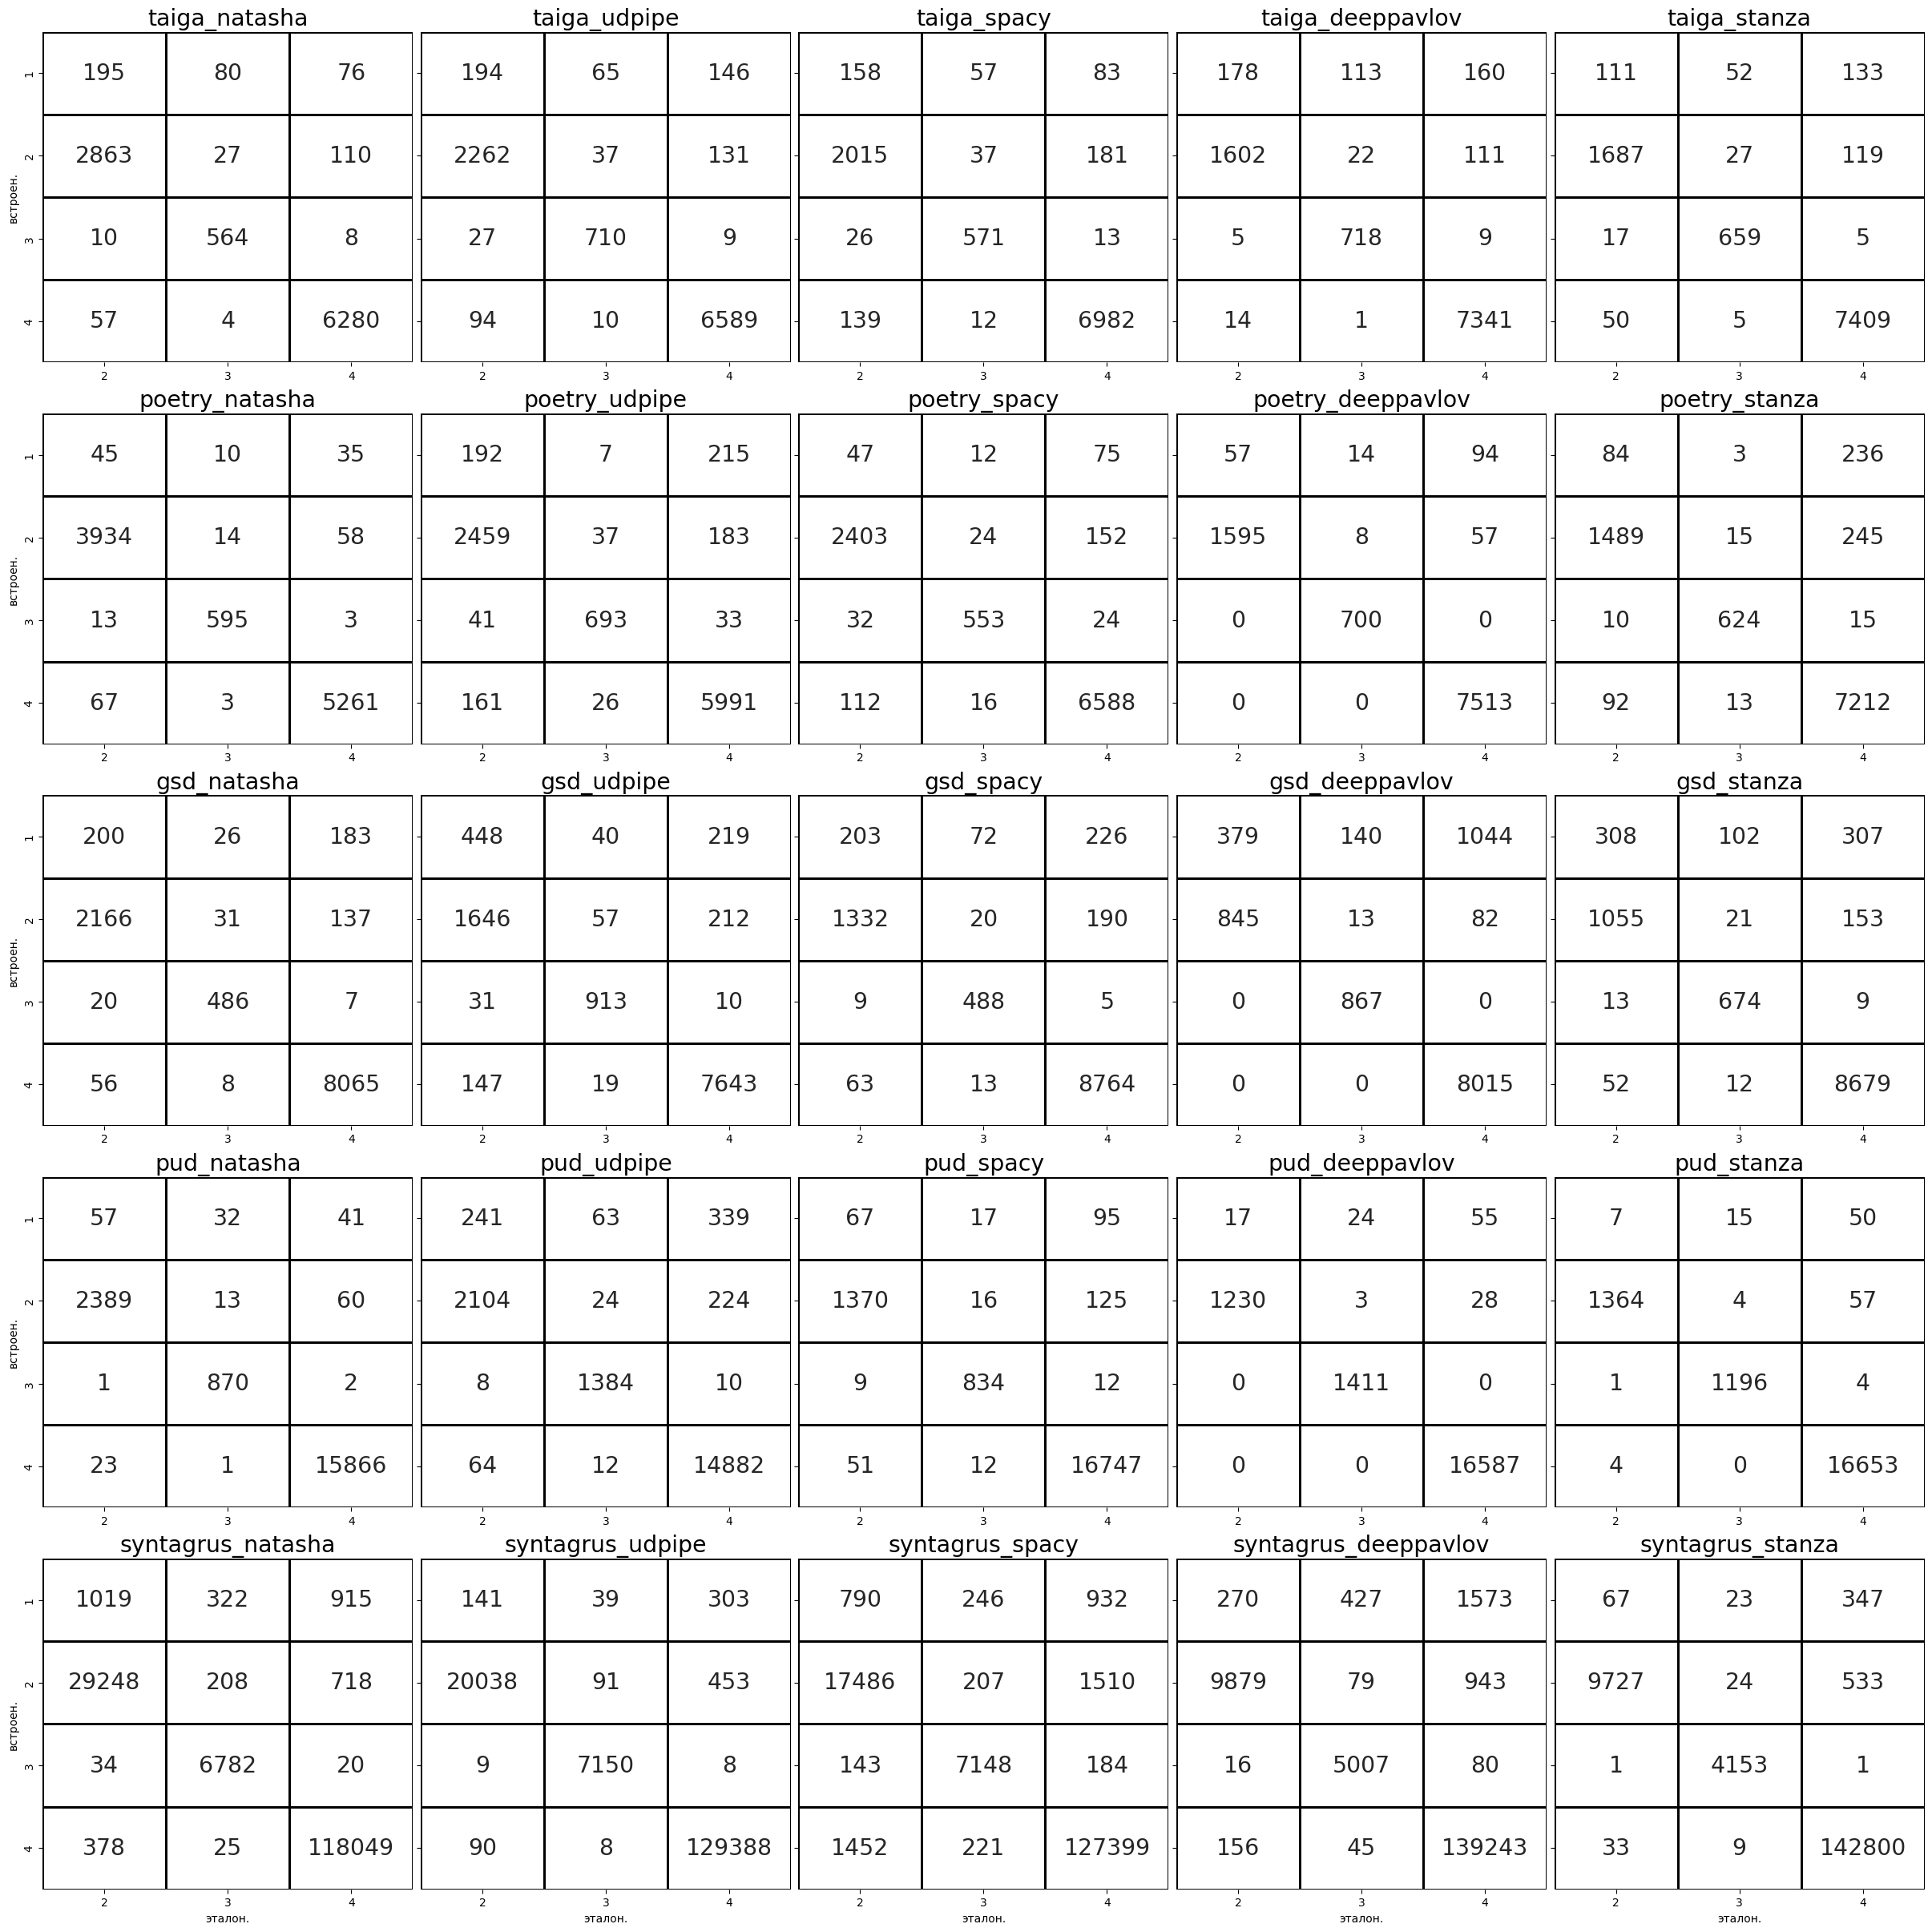

In [ ]:
f, axs = plt.subplots(len(treebank_names), len(real_parser_names), figsize=(24, 24), constrained_layout=True)
sns.set(font_scale=1.7)
for tr_i, tr in enumerate(treebank_names):
    for p_i, p in enumerate(real_parser_names):
      df = token_stat_df[tr][p]
      c = [[len(df[(df['p_category'] == i) & (df['pt_category'] == j)])
            for j in range(2, 5)] for i in range(1, 5)]
      c_df = pd.DataFrame(c)
      if p_i == 0:
        c_df.index = list(range(1, 5))
        c_df.index.name = 'встроен.'
      else:
        c_df.index = ["", "", "", ""]
      c_df.columns = list(range(2, 5))
      if tr_i == len(treebank_names) - 1:
        c_df.columns.name = 'эталон.'
      sns.heatmap(c_df, cbar=False, annot=True,
                  fmt =".0f", cmap=['white'], linecolor='black', linewidth=0.9,
                  ax=axs[tr_i][p_i], label='big')
      axs[tr_i][p_i].set_title(f"{tr}_{p}")
plt.savefig("/content/pics/category_heatmap.jpg")

# Изменение средних значений UAS и LAS

## Средние значения

In [ ]:
uas_mean_df = pd.DataFrame([[align_uas_f[treebank][p + suf].mean()
                          for treebank in treebank_names for suf in ["", "_t"]] for p in real_parser_names],
                        index=real_parser_names, columns=[(t + suf) for t in treebank_names for suf in ["", "_t"]])

In [ ]:
uas_mean_df["mean"] = uas_mean_df['taiga'].copy()
for tr in treebank_names[1:]:
    print(tr)
    uas_mean_df["mean"] += uas_mean_df[tr]
uas_mean_df["mean"] /= 5

poetry
gsd
pud
syntagrus


In [ ]:
uas_mean_df["mean_t"] = uas_mean_df['taiga_t'].copy()
for tr in treebank_names[1:]:
    print(tr)
    uas_mean_df["mean_t"] += uas_mean_df[f"{tr}_t"]
uas_mean_df["mean_t"] /= 5

poetry
gsd
pud
syntagrus


In [ ]:
uas_mean_df.round(2)

,taiga,taiga_t,poetry,poetry_t,gsd,gsd_t,pud,pud_t,syntagrus,syntagrus_t,mean,mean_t
natasha,0.70,0.73,0.64,0.65,0.79,0.83,0.88,0.89,0.83,0.84,0.77,0.79
udpipe,0.73,0.78,0.72,0.77,0.79,0.83,0.86,0.89,0.88,0.89,0.80,0.83
spacy,0.77,0.79,0.75,0.77,0.84,0.88,0.91,0.93,0.87,0.88,0.83,0.85
deeppavlov,0.79,0.84,0.84,0.86,0.83,0.91,0.94,0.94,0.92,0.94,0.86,0.90
stanza,0.79,0.84,0.82,0.87,0.85,0.89,0.93,0.93,0.94,0.94,0.86,0.90


In [ ]:
las_mean_df = pd.DataFrame([[align_las_f[treebank][p + suf].mean()
                          for treebank in treebank_names for suf in ["", "_t"]] for p in real_parser_names],
                        index=real_parser_names, columns=[(t + suf) for t in treebank_names for suf in ["", "_t"]])

In [ ]:
las_mean_df.round(2)

,taiga,taiga_t,poetry,poetry_t,gsd,gsd_t,pud,pud_t,syntagrus,syntagrus_t
natasha,0.64,0.66,0.58,0.59,0.75,0.78,0.84,0.84,0.78,0.79
udpipe,0.66,0.69,0.65,0.70,0.71,0.73,0.79,0.81,0.84,0.84
spacy,0.70,0.72,0.69,0.71,0.80,0.83,0.87,0.88,0.82,0.83
deeppavlov,0.72,0.75,0.78,0.80,0.75,0.82,0.86,0.87,0.89,0.91
stanza,0.72,0.76,0.76,0.81,0.79,0.82,0.87,0.87,0.91,0.92


In [ ]:
las_mean_df["mean"] = las_mean_df['taiga'].copy()
for tr in treebank_names[1:]:
    print(tr)
    las_mean_df["mean"] += las_mean_df[tr]
las_mean_df["mean"] /= 5

poetry
gsd
pud
syntagrus


In [ ]:
las_mean_df["mean_t"] = las_mean_df['taiga_t'].copy()
for tr in treebank_names[1:]:
    print(tr)
    las_mean_df["mean_t"] += las_mean_df[f"{tr}_t"]
las_mean_df["mean_t"] /= 5

poetry
gsd
pud
syntagrus


In [ ]:
las_mean_df.round(2)

,taiga,taiga_t,poetry,poetry_t,gsd,gsd_t,pud,pud_t,syntagrus,syntagrus_t,mean,mean_t
natasha,0.64,0.66,0.58,0.59,0.75,0.78,0.84,0.84,0.78,0.79,0.72,0.73
udpipe,0.66,0.69,0.65,0.70,0.71,0.73,0.79,0.81,0.84,0.84,0.73,0.75
spacy,0.70,0.72,0.69,0.71,0.80,0.83,0.87,0.88,0.82,0.83,0.78,0.80
deeppavlov,0.72,0.75,0.78,0.80,0.75,0.82,0.86,0.87,0.89,0.91,0.80,0.83
stanza,0.72,0.76,0.76,0.81,0.79,0.82,0.87,0.87,0.91,0.92,0.81,0.84


## Количество 1.0

In [ ]:
uas_mean_1 = pd.DataFrame([[align_uas_f[treebank][p + suf].value_counts(normalize=False)[1.0]
                          for treebank in treebank_names for suf in ["", "_t"]] for p in real_parser_names],
                        index=real_parser_names, columns=[(t + suf) for t in treebank_names for suf in ["", "_t"]])

In [ ]:
uas_mean_1

,taiga,taiga_t,poetry,poetry_t,gsd,gsd_t,pud,pud_t,syntagrus,syntagrus_t
natasha,225,237,131,137,121,127,281,286,2397,2443
udpipe,246,296,192,232,137,144,282,293,3375,3431
spacy,288,312,201,219,177,192,376,399,3159,3298
deeppavlov,314,359,284,299,221,236,453,464,4472,4760
stanza,294,360,239,311,179,198,400,415,4708,4860


In [ ]:
las_mean_1 = pd.DataFrame([[align_las_f[treebank][p + suf].value_counts(normalize=False)[1.0]
                          for treebank in treebank_names for suf in ["", "_t"]] for p in real_parser_names],
                        index=real_parser_names, columns=[(t + suf) for t in treebank_names for suf in ["", "_t"]])

In [ ]:
las_mean_1

,taiga,taiga_t,poetry,poetry_t,gsd,gsd_t,pud,pud_t,syntagrus,syntagrus_t
natasha,147,149,103,105,77,79,166,168,1601,1611
udpipe,159,180,137,166,46,46,109,113,2279,2303
spacy,199,205,152,164,119,124,226,237,1920,1994
deeppavlov,194,207,189,197,77,82,179,181,3247,3376
stanza,184,216,173,219,85,89,192,195,3606,3725


## Количество 0.0

In [ ]:
def count_0(df):
  d = df.value_counts()
  if 0 in d:
    return d[0]
  return 0

uas_mean_0 = pd.DataFrame([[count_0(align_uas_f[treebank][p + suf])
                          for treebank in treebank_names for suf in ["", "_t"]] for p in real_parser_names],
                        index=real_parser_names, columns=[(t + suf) for t in treebank_names for suf in ["", "_t"]])

In [ ]:
uas_mean_0

,taiga,taiga_t,poetry,poetry_t,gsd,gsd_t,pud,pud_t,syntagrus,syntagrus_t
natasha,24,12,29,23,1,1,0,0,31,23
udpipe,24,11,17,12,2,1,0,0,21,18
spacy,18,12,31,27,1,1,0,0,29,23
deeppavlov,23,9,6,3,8,1,0,0,31,10
stanza,12,8,6,4,1,1,0,0,16,12


In [ ]:
las_mean_0 = pd.DataFrame([[count_0(align_las_f[treebank][p + suf])
                          for treebank in treebank_names for suf in ["", "_t"]] for p in real_parser_names],
                        index=real_parser_names, columns=[(t + suf) for t in treebank_names for suf in ["", "_t"]])

In [ ]:
las_mean_0

,taiga,taiga_t,poetry,poetry_t,gsd,gsd_t,pud,pud_t,syntagrus,syntagrus_t
natasha,34,23,33,27,2,2,0,0,35,28
udpipe,30,17,20,13,3,2,0,0,25,23
spacy,23,17,33,28,1,1,0,0,35,30
deeppavlov,26,13,7,4,9,2,0,0,35,14
stanza,14,10,7,5,3,1,0,0,17,13


# Пример существенного увеличения UAS

In [ ]:
for tr in treebank_names:
  for p in real_parser_names:
    print(tr, p, max(metric_diff_stat[tr][p]['uas_f']))

taiga natasha 1.0
taiga udpipe 1.0
taiga spacy 1.0
taiga deeppavlov 1.0
taiga stanza 1.0
poetry natasha 1.0
poetry udpipe 1.0
poetry spacy 1.0
poetry deeppavlov 1.0
poetry stanza 1.0
gsd natasha 0.4761904761904762
gsd udpipe 0.8181818181818182
gsd spacy 0.6737967914438503
gsd deeppavlov 0.9124119718309859
gsd stanza 0.6666666666666666
pud natasha 0.29999999999999993
pud udpipe 0.6470588235294117
pud spacy 0.6666666666666667
pud deeppavlov 0.33597883597883593
pud stanza 0.6666666666666667
syntagrus natasha 1.0
syntagrus udpipe 1.0
syntagrus spacy 1.0
syntagrus deeppavlov 1.0
syntagrus stanza 1.0


In [ ]:
for p in real_parser_names:
  print(p)
  d = metric_diff_stat['syntagrus'][p]
  for s_i in d[d['uas_f'] == 1].index:
    print(s_i, treebanks['syntagrus'][s_i].text)
  print()

natasha
842 Г. Сатаров.
843 Безрыбье-2.

udpipe
3795 Г. Дубна.
4901 Ионно-молекулярное разнообразие.

spacy
2275 Это во-первых.
2638 Гран-при.
5951 Конец цитаты.

deeppavlov
412 Не разобравшись…
419 И вот…
604 - Я ничего не хочу…
665 Если это отрепетировать…
843 Безрыбье-2.
1500 О перепроизводстве…
2443 И снова неудача…
3795 Г. Дубна.
4812 Пережитки…
4841 Время шло…
5947 Остается…
5948 Да…
5950 Это прекрасная власть…
6037 Минуточку…

stanza
3795 Г. Дубна.



In [ ]:
[t.form for t in treebanks['syntagrus'][4841].tokens]

['Время', 'шло', '…']

In [ ]:
[t.form for t in parser_res['deeppavlov']['syntagrus'][4841].tokens]

['Время', 'шло…']

In [ ]:
for p in real_parser_names:
  print(p)
  d = metric_diff_stat['syntagrus'][p]
  for s_i in d[d['uas_f'] > 0.8].index:
    print(s_i, d.loc[s_i]['uas_f'], treebanks['syntagrus'][s_i].text)
  print()

natasha
842 1.0 Г. Сатаров.
843 1.0 Безрыбье-2.

udpipe
3795 1.0 Г. Дубна.
4901 1.0 Ионно-молекулярное разнообразие.

spacy
2275 1.0 Это во-первых.
2638 1.0 Гран-при.
5951 1.0 Конец цитаты.
8496 0.875 Внутри это было что-то вроде поликлиники.

deeppavlov
412 1.0 Не разобравшись…
419 1.0 И вот…
604 1.0 - Я ничего не хочу…
665 1.0 Если это отрепетировать…
843 1.0 Безрыбье-2.
1500 1.0 О перепроизводстве…
2443 1.0 И снова неудача…
2831 0.8571428571428572 Рождение Формулы-1 (1950-1980)
3795 1.0 Г. Дубна.
4812 1.0 Пережитки…
4841 1.0 Время шло…
5947 1.0 Остается…
5948 1.0 Да…
5950 1.0 Это прекрасная власть…
6037 1.0 Минуточку…
8023 0.8333333333333334 - А ты-то?

stanza
3795 1.0 Г. Дубна.
8023 0.8333333333333334 - А ты-то?
8285 0.8461538461538461 - А пылищу гонять нечего.



In [ ]:
d = token_stat_df['syntagrus']['spacy']
d[d['sent_i'] == 8496]

,sent_i,sent_id,g_t_be,p_match_flag,p_head_flag,p_rel_flag,pt_match_flag,pt_head_flag,pt_rel_flag,gold_pos,gold_rel,p_category,pt_category
153954,8496,2020_RFFIMoskva_2042.xml_439,"(0, 6)",True,False,True,True,True,True,ADV,advmod,2,4
153955,8496,2020_RFFIMoskva_2042.xml_439,"(7, 10)",True,False,True,True,True,True,PRON,nsubj,2,4
153956,8496,2020_RFFIMoskva_2042.xml_439,"(11, 15)",True,False,True,True,True,True,AUX,cop,2,4
153957,8496,2020_RFFIMoskva_2042.xml_439,"(16, 22)",False,False,False,True,True,True,PRON,root,1,4
153958,8496,2020_RFFIMoskva_2042.xml_439,"(23, 28)",True,True,True,True,True,True,ADP,case,4,4
153959,8496,2020_RFFIMoskva_2042.xml_439,"(29, 40)",True,False,False,True,True,True,NOUN,nmod,2,4
153960,8496,2020_RFFIMoskva_2042.xml_439,"(40, 41)",True,False,True,True,True,True,PUNCT,punct,2,4


In [ ]:
[(t.id, t.form, t.parent_id, t.relation) for t in treebanks['syntagrus'][8496].tokens]

[('1', 'Внутри', '4', 'advmod'),
 ('2', 'это', '4', 'nsubj'),
 ('3', 'было', '4', 'cop'),
 ('4', 'что-то', '0', 'root'),
 ('5', 'вроде', '6', 'case'),
 ('6', 'поликлиники', '4', 'nmod'),
 ('7', '.', '4', 'punct')]

In [ ]:
[(t.id, t.form, t.parent_id, t.relation) for t in parser_res['spacy']['syntagrus'][8496].tokens]

[('1', 'Внутри', '4', 'advmod'),
 ('2', 'это', '4', 'nsubj'),
 ('3', 'было', '4', 'cop'),
 ('4', 'что', '0', 'root'),
 ('5', '-', '4', 'obj'),
 ('6', 'то', '4', 'conj'),
 ('7', 'вроде', '8', 'case'),
 ('8', 'поликлиники', '4', 'obl'),
 ('9', '.', '4', 'punct')]

In [ ]:
align_uas_f['syntagrus']['spacy'].loc[8496]

np.float64(0.125)

In [ ]:
[(t.id, t.form, t.parent_id, t.relation) for t in parser_res['spacy_t']['syntagrus'][8496].tokens]

[('1', 'Внутри', '4', 'advmod'),
 ('2', 'это', '4', 'nsubj'),
 ('3', 'было', '4', 'cop'),
 ('4', 'что-то', '0', 'root'),
 ('5', 'вроде', '6', 'case'),
 ('6', 'поликлиники', '4', 'nmod'),
 ('7', '.', '4', 'punct')]

In [ ]:
align_uas_f['syntagrus']['spacy_t'].loc[8496]

np.float64(1.0)

# Пример существенного уменьшения UAS (и "побочного эффекта")

In [ ]:
for tr in treebank_names:
 for p in real_parser_names:
  print(tr, p)
  d = metric_diff_stat[tr][p]
  for s_i in d[d['uas_f'] < -0.3].index:
    print(s_i, d.loc[s_i]['uas_f'], treebanks[tr][s_i].text)
  print()
 print("-------")

taiga natasha

taiga udpipe
351 -0.31481481481481477 Поместить в нагретую до 180с духовку и выпекать 20-30 мин.

taiga spacy
88 -0.4285714285714286 Нам всё — надсада и помеха.
142 -0.3076923076923077 Вячеслав, почему бы Вам не возглавить КПРФ Пока оно ещё есть.
225 -0.5 Всё - бесплатно!
339 -0.4545454545454546 А дальше - простор для фантазии или смотрим по готовности.
536 -0.375 Продаю просто чтобы не тащить с собой.
540 -0.3333333333333333 ЦЕНА: договорная
586 -0.4 🎄Детские новогодние песни🎄
874 -0.5 И все!!!

taiga deeppavlov

taiga stanza
696 -0.4 Совсем скоро каждый зритель сможет стать частью действия. #atlasweekend #shyshkarova #performance #echo #art #life
830 -0.6666666666666665 Б-г вам судья!

-------
poetry natasha

poetry udpipe
111 -0.5142857142857142 И сила -- устоять в борьбе!
257 -0.3076923076923077 И по двору - шмыгают сестры: В бараках нынче нет больных.
331 -0.3241106719367589 Враг дождется невдолге -- Затрещит голова Во разгульи на Волге.
655 -0.37777777777777777 Гас

In [ ]:
print([(t.id, t.form, t.parent_id, t.relation) for t in treebanks['syntagrus'][8773].tokens])
print([(t.id, t.form, t.parent_id, t.relation) for t in parser_res['spacy']['syntagrus'][8773].tokens])
print([(t.id, t.form, t.parent_id, t.relation) for t in parser_res['spacy_t']['syntagrus'][8773].tokens])

[('1', 'Бритва', '5', 'nsubj'), ('2', 'была', '5', 'cop'), ('3', 'где-то', '5', 'advmod'), ('4', 'на', '5', 'case'), ('5', 'дне', '0', 'root'), ('6', '.', '5', 'punct')]
[('1', 'Бритва', '7', 'nsubj'), ('2', 'была', '1', 'cop'), ('3', 'где', '2', 'advmod'), ('4', '-', '1', 'advmod'), ('5', 'то', '7', 'advmod'), ('6', 'на', '7', 'case'), ('7', 'дне', '0', 'root'), ('8', '.', '7', 'punct')]
[('1', 'Бритва', '3', 'nsubj'), ('2', 'была', '3', 'cop'), ('3', 'где-то', '0', 'root'), ('4', 'на', '5', 'case'), ('5', 'дне', '3', 'nmod'), ('6', '.', '3', 'punct')]


In [ ]:
d = token_stat_df['syntagrus']['spacy']
d[d['sent_i'] == 8773]

,sent_i,sent_id,g_t_be,p_match_flag,p_head_flag,p_rel_flag,pt_match_flag,pt_head_flag,pt_rel_flag,gold_pos,gold_rel,p_category,pt_category
157492,8773,2020_RFFIMoskva_2042.xml_716,"(0, 6)",True,True,True,True,False,True,NOUN,nsubj,4,2
157493,8773,2020_RFFIMoskva_2042.xml_716,"(7, 11)",True,False,True,True,False,True,AUX,cop,2,2
157494,8773,2020_RFFIMoskva_2042.xml_716,"(12, 18)",False,False,False,True,False,False,ADV,advmod,1,2
157495,8773,2020_RFFIMoskva_2042.xml_716,"(19, 21)",True,True,True,True,True,True,ADP,case,4,4
157496,8773,2020_RFFIMoskva_2042.xml_716,"(22, 25)",True,True,True,True,False,False,NOUN,root,4,2
157497,8773,2020_RFFIMoskva_2042.xml_716,"(25, 26)",True,True,True,True,False,True,PUNCT,punct,4,2


In [ ]:
metric_diff_stat['syntagrus']['spacy'].loc[8773]

,8773
uas_precision,-0.333333
uas_recall,-0.500000
uas_f,-0.404762
las_precision,-0.333333
las_recall,-0.500000
las_f,-0.404762
precision_denominator,-2.000000
recall_denominator,0.000000
parent_matched,-3.000000
relation_matched,-3.000000


In [ ]:
[(t.id, t.form, t.parent_id, t.relation) for t in treebanks['syntagrus'][8773].tokens]

[('1', 'Бритва', '5', 'nsubj'),
 ('2', 'была', '5', 'cop'),
 ('3', 'где-то', '5', 'advmod'),
 ('4', 'на', '5', 'case'),
 ('5', 'дне', '0', 'root'),
 ('6', '.', '5', 'punct')]

In [ ]:
[(t.id, t.form, t.parent_id, t.relation) for t in parser_res['spacy']['syntagrus'][8773].tokens]

[('1', 'Бритва', '7', 'nsubj'),
 ('2', 'была', '1', 'cop'),
 ('3', 'где', '2', 'advmod'),
 ('4', '-', '1', 'advmod'),
 ('5', 'то', '7', 'advmod'),
 ('6', 'на', '7', 'case'),
 ('7', 'дне', '0', 'root'),
 ('8', '.', '7', 'punct')]

In [ ]:
align_uas_f['syntagrus']['spacy'].loc[8773].round(2)

np.float64(0.57)

In [ ]:
[(t.id, t.form, t.parent_id, t.relation) for t in parser_res['spacy_t']['syntagrus'][8773].tokens]

[('1', 'Бритва', '3', 'nsubj'),
 ('2', 'была', '3', 'cop'),
 ('3', 'где-то', '0', 'root'),
 ('4', 'на', '5', 'case'),
 ('5', 'дне', '3', 'nmod'),
 ('6', '.', '3', 'punct')]

In [ ]:
align_uas_f['syntagrus']['spacy_t'].loc[8773].round(2)

np.float64(0.17)

# Пример предложения со всеми категориями

In [ ]:
tr = 'syntagrus'
p = 'stanza'
df = token_stat_df[tr][p].groupby('sent_i')[['p_category', 'pt_category']].apply(lambda x: x.value_counts())

In [ ]:
from collections import defaultdict

d = defaultdict(set)
for (s_i, p_cat, _) in df.index:
  d[s_i].add(p_cat)

In [ ]:
for tr in treebank_names:
 for p in real_parser_names:
  df = token_stat_df[tr][p].groupby('sent_i')[['p_category', 'pt_category']].apply(lambda x: x.value_counts())
  d = defaultdict(set)
  for (s_i, p_cat, _) in df.index:
    d[s_i].add(p_cat)
  print(tr, p)
  for k, v in d.items():
    if v == {1, 2, 3, 4}:
      if len(treebanks[tr][k].tokens) < 10:
        print(k, treebanks[tr][k].text)
  print()
 print("---------------------")

taiga natasha
202 @xxxxxx - Или у тебя мозги гнилые.
211 В 20.20 остановка во Владимире @xxxxxx @xxxxxx
232 жириновский предложил ****ять надежду савченко, ****ить киев
242 Он им расскажет, кто в доме хозяин))
246 вот так нас и подкупают)))))) @...
272 @xxxxxx Так ведь и я о том!
356 сок лимона — 0,5 ч.л.
421 -Кофе молотый - 2 cт.л.
541 :)))) вот такое сегодня утро
611 1. Переходишь по ссылочке http://xxxxxx
632 А потом вон оно что оказалось: http://xxxxxx
875 За 6 лет освоено 42 млн. га.

taiga udpipe
188 @xxxxxx На педофила он не тянет.
211 В 20.20 остановка во Владимире @xxxxxx @xxxxxx
266 Ну разве,я много прошу
271 RT @xxxxxx: Игорёк.
274 Но, там макс. 2-3 года.
280 ...наука должна не получать,а зарабатывать.
290 Да же педали су..ки отпилили!!!
313 Ври дальше пропутинский тролль! )))
379 А вот ещё вопрос, вы прививки ставите?...
486 Мамочки, с Праздником нас!!!🌹🌹🌹
526 ЦЕНА для высоты 2,2 м: 12560р.
538 3. Мультиварка Redmond RMC-FM4521.
543 И это только начало! ;)
576 Девки не грус

In [ ]:
[(t.id, t.form, t.parent_id, t.relation) for t in parser_res['udpipe']['syntagrus'][4397].tokens]

[('1', 'В', '2', 'case'),
 ('2', 'апреле', '6', 'obl'),
 ('3', '1916', '4', 'nummod'),
 ('4', 'года', '2', 'nmod'),
 ('5', 'был', '6', 'cop'),
 ('6', 'произведён', '0', 'root'),
 ('7', 'в', '8', 'case'),
 ('8', 'контр', '6', 'obl'),
 ('9', '-', '10', 'punct'),
 ('10', 'адмиралы', '6', 'parataxis'),
 ('11', '.', '6', 'punct')]

In [ ]:
[(t.id, t.form, t.parent_id, t.relation) for t in treebanks['syntagrus'][4397].tokens]

[('1', 'В', '2', 'case'),
 ('2', 'апреле', '6', 'obl'),
 ('3', '1916', '4', 'amod'),
 ('4', 'года', '2', 'nmod'),
 ('5', 'был', '6', 'aux:pass'),
 ('6', 'произведён', '0', 'root'),
 ('7', 'в', '8', 'case'),
 ('8', 'контр-адмиралы', '6', 'obl'),
 ('9', '.', '6', 'punct')]

In [ ]:
d = token_stat_df['syntagrus']['udpipe']
d[d['sent_i'] == 4397]

,sent_i,sent_id,g_t_be,p_match_flag,p_head_flag,p_rel_flag,pt_match_flag,pt_head_flag,pt_rel_flag,gold_pos,gold_rel,p_category,pt_category
78794,4397,2012Kolchak.xml_93,"(0, 1)",True,True,True,True,True,True,ADP,case,4,4
78795,4397,2012Kolchak.xml_93,"(2, 8)",True,True,True,True,True,True,NOUN,obl,4,4
78796,4397,2012Kolchak.xml_93,"(9, 13)",True,True,False,True,True,False,ADJ,amod,3,3
78797,4397,2012Kolchak.xml_93,"(14, 18)",True,True,True,True,True,True,NOUN,nmod,4,4
78798,4397,2012Kolchak.xml_93,"(19, 22)",True,True,False,True,True,False,AUX,aux:pass,3,3
78799,4397,2012Kolchak.xml_93,"(23, 33)",True,True,True,True,True,True,VERB,root,4,4
78800,4397,2012Kolchak.xml_93,"(34, 35)",True,False,True,True,True,True,ADP,case,2,4
78801,4397,2012Kolchak.xml_93,"(36, 50)",False,False,False,True,True,True,NOUN,obl,1,4
78802,4397,2012Kolchak.xml_93,"(50, 51)",True,True,True,True,True,True,PUNCT,punct,4,4


In [ ]:
[t.form for t in parser_res['udpipe']['syntagrus'][4397].tokens]

['В',
 'апреле',
 '1916',
 'года',
 'был',
 'произведён',
 'в',
 'контр',
 '-',
 'адмиралы',
 '.']